# Deep Q Network (DQN)
In this notebook, we will run a DQN agent. <br>
This notebook is only an interface between the agent and the environment. <br>
If you are learning DQN, the most important code to understand is dqn.py . You should look through dqn.py before running this notebook. <br>

In [1]:
import gym
import numpy as np
import torch
import itertools

We put the hyperparameters in a class format.

In [2]:
class Args:
    gamma = 0.99
    tau = 0.005       # target smoothing coefficient(τ)
    lr = 0.0003       # learning rate
    eps_min = 0.01    # minimum value of epsilon, for epsilon-greedy selection
    eps_decays = 5000 # number of time steps to decay epsilon over
    num_steps = 10000 # total number of training time steps
    start_steps = 500 # time steps before learning and using action from policy
    hidden_size = 256 # size of hidden layers for value function
    batch_size = 128
    buffer_size = 1000000
    update_freq = 4
    cuda = False
args = Args()

## Instantiate Environment and Agent
Here we use a simple environment, CartPole from OpenAI gym, so we learn on it quickly (within thousands of time steps of training). <br>
You can also train on other environments with the same code and modified hyperparameters, although that wouldu usually require many more time steps of training. 

In [3]:
env = gym.make('CartPole-v1')
print ("state size :", env.observation_space.shape[0])
print ("action space : ", env.action_space)
print ("number of actions : ", env.action_space.n)

state size : 4
action space :  Discrete(2)
number of actions :  2


Here we instantiate our agent. See dqn.py (in this directory) for source code of the DQN agent. <br>
We pass the state size, number of actions, action space, and our hyperparameter object as the initial parameters for the agent.

In [4]:
from dqn import DQN
agent = DQN(env.observation_space.shape[0], env.action_space.n, env.action_space, args)

We use QuickLogger to log the agent performance while learning. <br>
To see the source code of QuickLogger, see the class QuickLogger in utils/loggin.py

In [5]:
from utils.loggin import QuickLogger
LOG = QuickLogger()
LOG.create("score")
LOG.create("q_loss")

## Learning Loop

In [6]:
total_numsteps = 0
for i_episode in itertools.count(1):

    episode_reward = 0
    episode_steps = 0
    done = False
    state = env.reset()

    while not done:
        if total_numsteps < args.start_steps:
            action = env.action_space.sample()  # Sample random action
        else:
            action = agent.act(state)  # Sample action from policy

        next_state, reward, done, _ = env.step(action) 
        episode_steps += 1
        total_numsteps += 1
        episode_reward += reward

        mask = float(not done)
        agent.step(state, action, reward, next_state, mask)
        
        if total_numsteps >= args.start_steps and total_numsteps % args.update_freq == 0:
            q_loss = agent.update()
            LOG.log("q_loss", q_loss, total_numsteps)

        state = next_state
    
    LOG.log("score", episode_reward, total_numsteps)
    if i_episode % 10 == 0:
        print("Episode: {}, total numsteps: {}, episode steps: {}, reward: {}".format(i_episode, total_numsteps, episode_steps, round(episode_reward, 2)))

    if total_numsteps > args.num_steps:
        break

Episode: 10, total numsteps: 227, episode steps: 13, reward: 13.0
Episode: 20, total numsteps: 453, episode steps: 13, reward: 13.0
Episode: 30, total numsteps: 634, episode steps: 21, reward: 21.0
Episode: 40, total numsteps: 785, episode steps: 18, reward: 18.0
Episode: 50, total numsteps: 990, episode steps: 11, reward: 11.0
Episode: 60, total numsteps: 1138, episode steps: 10, reward: 10.0
Episode: 70, total numsteps: 1283, episode steps: 13, reward: 13.0
Episode: 80, total numsteps: 1421, episode steps: 14, reward: 14.0
Episode: 90, total numsteps: 1561, episode steps: 20, reward: 20.0
Episode: 100, total numsteps: 1710, episode steps: 25, reward: 25.0
Episode: 110, total numsteps: 1920, episode steps: 17, reward: 17.0
Episode: 120, total numsteps: 2062, episode steps: 16, reward: 16.0
Episode: 130, total numsteps: 2186, episode steps: 9, reward: 9.0
Episode: 140, total numsteps: 2358, episode steps: 16, reward: 16.0
epsilon set to:  0.5049999999999213
Episode: 150, total numsteps

Plot the score using the logger we created. You can also plot q_loss to see loss through the learning process.

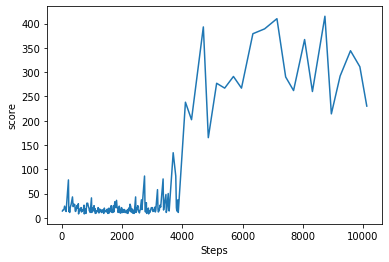

In [7]:
LOG.visualize("score")

## Watch a Trained Agent

In [8]:
import time
for i in range(3):
    state = env.reset()
    done = False
    print ("watching episode ", i + 1)
    while not done:
        action = agent.act(state)
        env.render()
        next_state, reward, done, _ = env.step(action)
        state = next_state

env.close()

watching episode  1
watching episode  2
watching episode  3
